# Import libraries

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

## Read the training dataset and begin EDA

In [19]:
house_data = pd.read_csv("train.csv")

In [20]:
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [21]:
house_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [22]:
house_data.shape

(1460, 81)

In [23]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [24]:
house_data['MSSubClass'].astype('category').value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [30]:
house_data['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

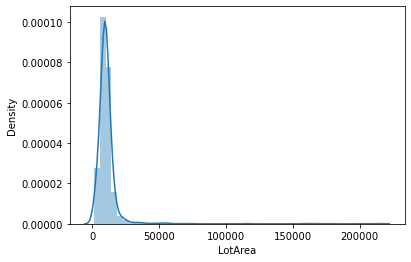

In [26]:
sns.distplot(house_data['LotArea'])
plt.show()

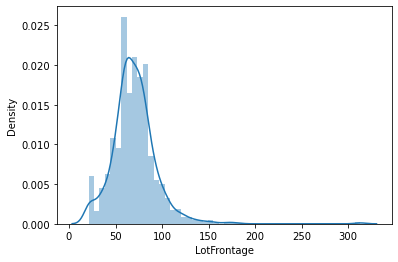

In [27]:
sns.distplot(house_data['LotFrontage'])
plt.show()

In [29]:
house_data['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [31]:
house_data['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [32]:
house_data['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [34]:
house_data['LandContour'].value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [35]:
house_data['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [36]:
house_data['LotConfig'].value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [37]:
house_data['LandSlope'].value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [38]:
house_data['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [39]:
house_data['Condition1'].value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [40]:
house_data['Condition2'].value_counts()

Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

In [41]:
house_data['BldgType'].value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [42]:
house_data['HouseStyle'].value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [44]:
house_data['OverallQual'].astype('category').value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

### Review numerical attributes for strudying relationships 

In [45]:
house_data_num = house_data.select_dtypes(include=['float64','int64'])
house_data_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [46]:
house_data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [47]:
#drop columns that will be converted to categorical
house_data_num = house_data_num.drop(['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
                                    'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
                                   'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 
                                   'MoSold', 'YrSold'], axis=1)

In [48]:
house_data_num.head(10)

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,1,65.0,8450,196.0,706,0,150,856,856,854,...,1710,548,0,61,0,0,0,0,0,208500
1,2,80.0,9600,0.0,978,0,284,1262,1262,0,...,1262,460,298,0,0,0,0,0,0,181500
2,3,68.0,11250,162.0,486,0,434,920,920,866,...,1786,608,0,42,0,0,0,0,0,223500
3,4,60.0,9550,0.0,216,0,540,756,961,756,...,1717,642,0,35,272,0,0,0,0,140000
4,5,84.0,14260,350.0,655,0,490,1145,1145,1053,...,2198,836,192,84,0,0,0,0,0,250000
5,6,85.0,14115,0.0,732,0,64,796,796,566,...,1362,480,40,30,0,320,0,0,700,143000
6,7,75.0,10084,186.0,1369,0,317,1686,1694,0,...,1694,636,255,57,0,0,0,0,0,307000
7,8,NaN,10382,240.0,859,32,216,1107,1107,983,...,2090,484,235,204,228,0,0,0,350,200000
8,9,51.0,6120,0.0,0,0,952,952,1022,752,...,1774,468,90,0,205,0,0,0,0,129900
9,10,50.0,7420,0.0,851,0,140,991,1077,0,...,1077,205,0,4,0,0,0,0,0,118000


In [49]:
house_data_num.describe()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1460.000000,1201.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,...,1515.463699,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,421.610009,24.284752,9981.264932,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,...,525.480383,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,1.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,...,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,365.750000,59.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,...,1129.500000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,730.500000,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,...,1464.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,1095.250000,80.000000,11601.500000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,...,1776.750000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
max,1460.000000,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,...,5642.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000


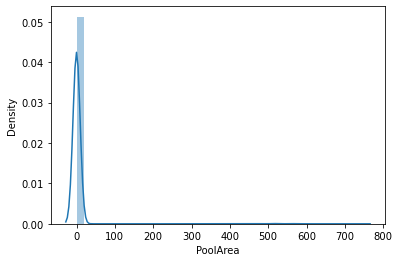

In [50]:
sns.distplot(house_data['PoolArea'])
plt.show()

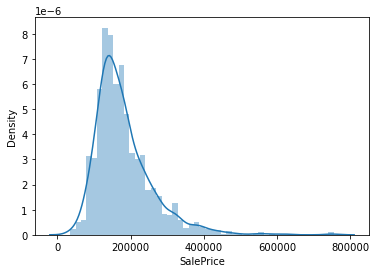

In [51]:
sns.distplot(house_data['SalePrice'])
plt.show()

### Analyze corelation  between sale price and other numerical variables

In [53]:
cor = house_data_num.corr()
cor

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
Id,1.000000,-0.010601,-0.033226,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,...,0.008273,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,-0.021917
LotFrontage,-0.010601,1.000000,0.426095,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,...,0.402797,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.351799
LotArea,-0.033226,0.426095,1.000000,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,...,0.263116,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.263843
MasVnrArea,-0.050298,0.193458,0.104160,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,...,0.390857,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,0.477493
BsmtFinSF1,-0.005024,0.233633,0.214103,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,...,0.208171,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,0.386420
BsmtFinSF2,-0.005968,0.049900,0.111170,-0.072319,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,...,-0.009640,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.011378
BsmtUnfSF,-0.007940,0.132644,-0.002618,0.114442,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,...,0.240257,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.214479
TotalBsmtSF,-0.015415,0.392075,0.260833,0.363936,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,...,0.454868,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.613581
1stFlrSF,0.010496,0.457181,0.299475,0.344501,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,...,0.566024,0.489782,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.605852
2ndFlrSF,0.005590,0.080177,0.050986,0.174561,-0.137079,-0.099260,0.004469,-0.174512,-0.202646,1.000000,...,0.687501,0.138347,0.092165,0.208026,0.061989,-0.024358,0.040606,0.081487,0.016197,0.319334


### Ground living area, Garage Area, Total basement square foot and 1st floor square foot are all positively corelated to sale price

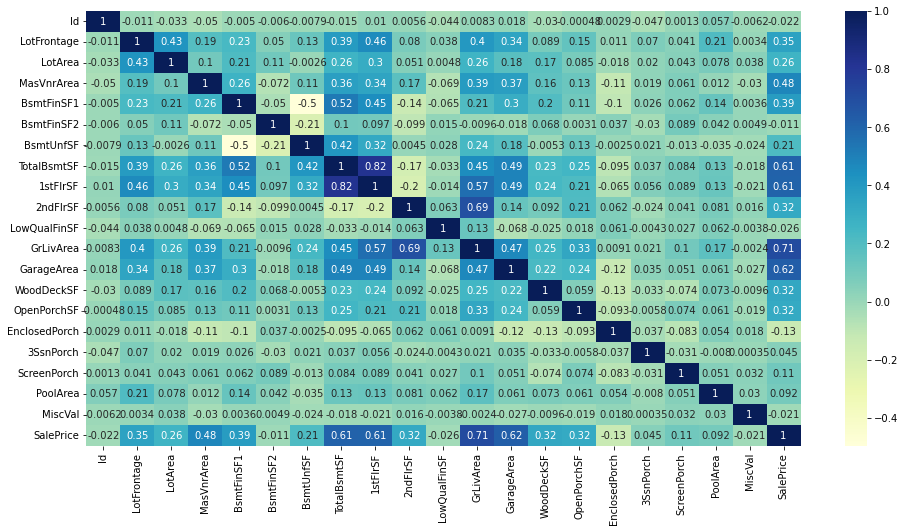

In [54]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x23d9a8b85b0>,
 'caps': [<matplotlib.lines.Line2D at 0x23d9a818280>,
 'boxes': [<matplotlib.lines.Line2D at 0x23d9a8b8580>],
 'medians': [<matplotlib.lines.Line2D at 0x23d9a818100>],
 'fliers': [<matplotlib.lines.Line2D at 0x23d9a8186d0>],
 'means': []}

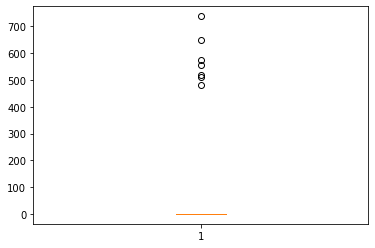

In [56]:
plt.boxplot(house_data['PoolArea'])

### exclude records with extreme outliers (over 90th percentile of all values)

In [57]:
#exclude extreme outliers
Q1 = house_data['PoolArea'].quantile(0.1)
Q3 = house_data['PoolArea'].quantile(0.9)
IQR = Q3 - Q1
house_data = house_data[(house_data['PoolArea'] >= Q1 - 1.5*IQR) & 
                      (house_data['PoolArea'] <= Q3 + 1.5*IQR)]
house_data.shape

(1453, 81)

{'whiskers': [<matplotlib.lines.Line2D at 0x23d9a70b640>,
 'caps': [<matplotlib.lines.Line2D at 0x23d9a70bcd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23d9a6fffd0>],
 'medians': [<matplotlib.lines.Line2D at 0x23d9a70b490>],
 'fliers': [<matplotlib.lines.Line2D at 0x23d9a6f3e20>],
 'means': []}

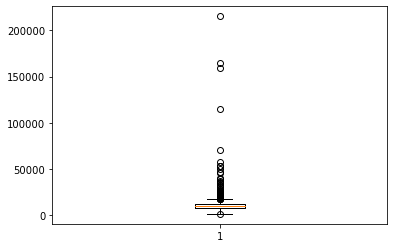

In [58]:
plt.boxplot(house_data['LotArea'])

In [59]:
#exclude extreme outliers
Q1 = house_data['LotArea'].quantile(0.1)
Q3 = house_data['LotArea'].quantile(0.9)
IQR = Q3 - Q1
house_data = house_data[(house_data['LotArea'] >= Q1 - 1.5*IQR) & 
                      (house_data['LotArea'] <= Q3 + 1.5*IQR)]
house_data.shape

(1430, 81)

{'whiskers': [<matplotlib.lines.Line2D at 0x23d97afbe50>,
 'caps': [<matplotlib.lines.Line2D at 0x23d9a5ab400>,
 'boxes': [<matplotlib.lines.Line2D at 0x23d98202f40>],
 'medians': [<matplotlib.lines.Line2D at 0x23d9a5ab580>],
 'fliers': [<matplotlib.lines.Line2D at 0x23d9a5abc70>],
 'means': []}

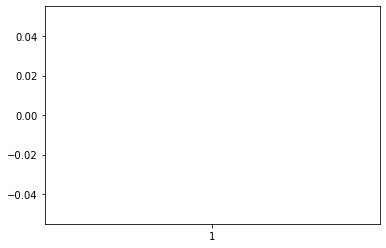

In [60]:
plt.boxplot(house_data['MasVnrArea'])

In [61]:
#exclude extreme outliers
Q1 = house_data['MasVnrArea'].quantile(0.1)
Q3 = house_data['MasVnrArea'].quantile(0.9)
IQR = Q3 - Q1
house_data = house_data[(house_data['MasVnrArea'] >= Q1 - 1.5*IQR) & 
                      (house_data['MasVnrArea'] <= Q3 + 1.5*IQR)]
house_data.shape

(1410, 81)

{'whiskers': [<matplotlib.lines.Line2D at 0x23d9826d9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x23d978515b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23d9826da00>],
 'medians': [<matplotlib.lines.Line2D at 0x23d97aeb070>],
 'fliers': [<matplotlib.lines.Line2D at 0x23d97aeb2e0>],
 'means': []}

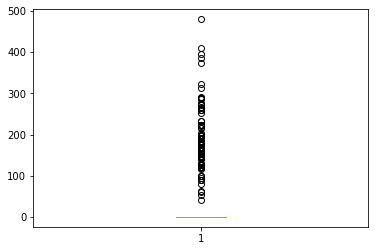

In [62]:
plt.boxplot(house_data['ScreenPorch'])

In [63]:
#exclude extreme outliers
Q1 = house_data['ScreenPorch'].quantile(0.1)
Q3 = house_data['ScreenPorch'].quantile(0.9)
IQR = Q3 - Q1
house_data = house_data[(house_data['ScreenPorch'] >= Q1 - 1.5*IQR) & 
                      (house_data['ScreenPorch'] <= Q3 + 1.5*IQR)]
house_data.shape

(1300, 81)

{'whiskers': [<matplotlib.lines.Line2D at 0x23d9a90d7f0>,
 'caps': [<matplotlib.lines.Line2D at 0x23d9a90ddc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23d9a90d670>],
 'medians': [<matplotlib.lines.Line2D at 0x23d9a9203a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23d9a920670>],
 'means': []}

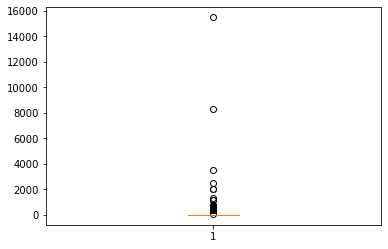

In [64]:
plt.boxplot(house_data['MiscVal'])

In [65]:
#exclude extreme outliers
Q1 = house_data['MiscVal'].quantile(0.1)
Q3 = house_data['MiscVal'].quantile(0.9)
IQR = Q3 - Q1
house_data = house_data[(house_data['MiscVal'] >= Q1 - 1.5*IQR) & 
                      (house_data['MiscVal'] <= Q3 + 1.5*IQR)]
house_data.shape

(1255, 81)

{'whiskers': [<matplotlib.lines.Line2D at 0x23d9a897b50>,
 'caps': [<matplotlib.lines.Line2D at 0x23d9a897fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23d9a897880>],
 'medians': [<matplotlib.lines.Line2D at 0x23d9a87b5b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23d9a87b880>],
 'means': []}

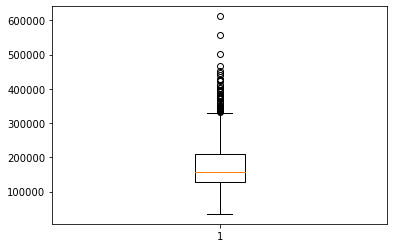

In [66]:
plt.boxplot(house_data['SalePrice'])

In [67]:
#exclude extreme outliers
Q1 = house_data['SalePrice'].quantile(0.1)
Q3 = house_data['SalePrice'].quantile(0.9)
IQR = Q3 - Q1
house_data = house_data[(house_data['SalePrice'] >= Q1 - 1.5*IQR) & 
                      (house_data['SalePrice'] <= Q3 + 1.5*IQR)]
house_data.shape

(1253, 81)

In [71]:
house_data.columns[house_data.isnull().any()].tolist()

['LotFrontage',
 'Alley',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [72]:
house_data.loc[:,house_data.isnull().any()]

,LotFrontage,Alley,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,NaN,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA,NaN,NaN,NaN
1,80.0,NaN,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA,NaN,NaN,NaN
2,68.0,NaN,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA,NaN,NaN,NaN
3,60.0,NaN,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA,NaN,NaN,NaN
4,84.0,NaN,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,62.0,Pave,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2004.0,RFn,TA,TA,NaN,NaN,NaN
1455,62.0,NaN,Gd,TA,No,Unf,Unf,SBrkr,TA,Attchd,1999.0,RFn,TA,TA,NaN,NaN,NaN
1456,85.0,NaN,Gd,TA,No,ALQ,Rec,SBrkr,TA,Attchd,1978.0,Unf,TA,TA,NaN,MnPrv,NaN
1458,68.0,NaN,TA,TA,Mn,GLQ,Rec,FuseA,NaN,Attchd,1950.0,Unf,TA,TA,NaN,NaN,NaN


In [74]:
house_data['Alley'].fillna('No alley access', inplace=True)

In [82]:
nan_cols90 = [i for i in house_data.columns if house_data[i].isnull().sum() > 0.90*len(house_data)]

In [83]:
nan_cols90

['PoolQC', 'MiscFeature']

In [84]:
#percentage of nulls for a column
house_data['MiscFeature'].isnull().sum() * 100/house_data.shape[0]

99.84038308060654

In [85]:
#percentage of nulls for a column
house_data['PoolQC'].isnull().sum() * 100/house_data.shape[0]

100.0

In [86]:
#drop MiscFeature as it has over 99% nulls
house_data = house_data.drop('MiscFeature', axis=1)

In [87]:
#substitute nulls with descriptive values
house_data['MasVnrType'].fillna('None', inplace=True)
house_data['FireplaceQu'].fillna('No Fireplace', inplace=True)
house_data['Fence'].fillna('No Fence', inplace=True) 
house_data['GarageType'].fillna('No Garage', inplace=True) 
house_data['GarageFinish'].fillna('No Garage', inplace=True) 
house_data['GarageQual'].fillna('No Garage', inplace=True) 
house_data['GarageCond'].fillna('No Garage', inplace=True) 
house_data['PoolQC'].fillna('No Pool', inplace=True) 

In [89]:
#substitute nulls with zeros
house_data['LotFrontage'].fillna(0, inplace=True) 
house_data['MasVnrArea'].fillna(0, inplace=True) 

In [90]:
#convert year to categorical
current_year = 2022
house_data['YearBuilt'] = current_year - house_data['YearBuilt']
house_data['YearRemodAdd'] = current_year - house_data['YearRemodAdd']
house_data['GarageYrBlt'] = current_year - house_data['GarageYrBlt']
house_data['YrSold'] = current_year - house_data['YrSold']

In [92]:
pd.set_option('display.max_columns', None)
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,19,19,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,19.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No Pool,No Fence,0,2,14,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,46,46,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,46.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No Pool,No Fence,0,5,15,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,21,20,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,21.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No Pool,No Fence,0,9,14,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,No alley access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,107,52,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,24.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No Pool,No Fence,0,2,16,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,22,22,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,22.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No Pool,No Fence,0,12,14,WD,Normal,250000


In [93]:
#convert to categorical variables
house_data['MSSubClass'] = house_data['MSSubClass'].astype('object')
house_data['Fireplaces'] = house_data['Fireplaces'].astype('object')
house_data['GarageCars'] = house_data['GarageCars'].astype('object')
house_data['BsmtFullBath'] = house_data['BsmtFullBath'].astype('object')
house_data['BsmtHalfBath'] = house_data['BsmtHalfBath'].astype('object')
house_data['FullBath'] = house_data['FullBath'].astype('object')
house_data['HalfBath'] = house_data['HalfBath'].astype('object')
house_data['OverallQual'] = house_data['OverallQual'].astype('object')
house_data['OverallCond'] = house_data['OverallCond'].astype('object')
house_data['BedroomAbvGr'] = house_data['BedroomAbvGr'].astype('object')
house_data['KitchenAbvGr'] = house_data['KitchenAbvGr'].astype('object')
house_data['TotRmsAbvGrd'] = house_data['TotRmsAbvGrd'].astype('object')

In [94]:
house_data.describe()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1175.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.0,1253.0,1253.0,1253.000000,1253.000000,1253.000000
mean,735.390263,57.155626,9453.073424,50.225858,36.832402,91.596169,415.545092,42.430966,575.154030,1033.130088,1138.328811,339.723863,5.628891,1483.681564,42.884255,465.175579,92.455706,45.534717,23.112530,3.717478,0.0,0.0,0.0,6.321628,14.204310,175517.833998
std,423.563494,33.289065,3791.778029,30.661361,20.803139,148.552208,417.150846,152.028345,445.780058,404.242442,362.547131,426.087315,47.499457,484.105544,24.875949,213.127153,119.819342,63.311831,61.543636,30.324075,0.0,0.0,0.0,2.688780,1.324896,70671.227080
min,1.000000,0.000000,1300.000000,12.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000,12.000000,34900.000000
25%,369.000000,42.000000,7332.000000,21.000000,18.000000,0.000000,0.000000,0.000000,218.000000,788.000000,864.000000,0.000000,0.000000,1120.000000,19.000000,312.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,5.000000,13.000000,128000.000000
50%,733.000000,62.000000,9200.000000,47.000000,28.000000,0.000000,353.000000,0.000000,490.000000,974.000000,1065.000000,0.000000,0.000000,1441.000000,41.000000,473.000000,0.000000,25.000000,0.000000,0.000000,0.0,0.0,0.0,6.000000,14.000000,158000.000000
75%,1104.000000,78.000000,11250.000000,69.000000,55.000000,156.000000,695.000000,0.000000,818.000000,1268.000000,1362.000000,720.000000,0.000000,1750.000000,60.000000,576.000000,168.000000,66.000000,0.000000,0.000000,0.0,0.0,0.0,8.000000,15.000000,210000.000000
max,1460.000000,313.000000,27650.000000,150.000000,72.000000,788.000000,1904.000000,1474.000000,2153.000000,3206.000000,3228.000000,1818.000000,528.000000,3493.000000,116.000000,1390.000000,736.000000,523.000000,386.000000,508.000000,0.0,0.0,0.0,12.000000,16.000000,501837.000000


In [95]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1253 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1253 non-null   int64  
 1   MSSubClass     1253 non-null   object 
 2   MSZoning       1253 non-null   object 
 3   LotFrontage    1253 non-null   float64
 4   LotArea        1253 non-null   int64  
 5   Street         1253 non-null   object 
 6   Alley          1253 non-null   object 
 7   LotShape       1253 non-null   object 
 8   LandContour    1253 non-null   object 
 9   Utilities      1253 non-null   object 
 10  LotConfig      1253 non-null   object 
 11  LandSlope      1253 non-null   object 
 12  Neighborhood   1253 non-null   object 
 13  Condition1     1253 non-null   object 
 14  Condition2     1253 non-null   object 
 15  BldgType       1253 non-null   object 
 16  HouseStyle     1253 non-null   object 
 17  OverallQual    1253 non-null   object 
 18  OverallC

### Converting categorical variables to binary values

In [96]:
temp_house = house_data

In [98]:
varlist = ['Utilities']

def binary_map(x):
    return x.map({'AllPub': 1, 'NoSeWa': 0})

temp_house[varlist] = temp_house[varlist].apply(binary_map)

In [99]:
varlist1 = ['CentralAir']

def binary_map(x):
    return x.map({'Y': 1, 'N': 0})

temp_house[varlist1] = temp_house[varlist1].apply(binary_map)

In [100]:
varlist2 = ['Street']

def binary_map(x):
    return x.map({'Pave': 1, 'Grvl': 0})

temp_house[varlist2] = temp_house[varlist2].apply(binary_map)

In [101]:
X = temp_house.drop(['Id'], axis=1)

In [102]:
# creating dummy variables for categorical variables

# subset all categorical variables
house_categorical = X.select_dtypes(include=['object'])
house_categorical.head()

,MSSubClass,MSZoning,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,Electrical,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,SaleType,SaleCondition
0,60,RL,No alley access,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,SBrkr,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,RFn,2,TA,TA,Y,No Pool,No Fence,WD,Normal
1,20,RL,No alley access,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,SBrkr,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,No Pool,No Fence,WD,Normal
2,60,RL,No alley access,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,SBrkr,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,No Pool,No Fence,WD,Normal
3,70,RL,No alley access,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,SBrkr,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,TA,TA,Y,No Pool,No Fence,WD,Abnorml
4,60,RL,No alley access,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,SBrkr,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,TA,TA,Y,No Pool,No Fence,WD,Normal


In [103]:
# convert into dummies - one hot encoding
house_dummies = pd.get_dummies(house_categorical, drop_first=True)
house_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_No alley access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,GarageQual_Po,GarageQual_T

In [104]:
# drop categorical variables 
X = X.drop(list(house_categorical.columns), axis=1)

In [105]:
# concat dummy variables with X
X = pd.concat([X, house_dummies], axis=1)

In [115]:
X.shape

(1253, 298)

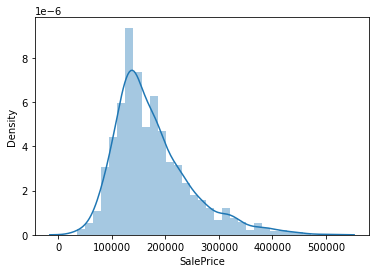

In [106]:
sns.distplot(X['SalePrice'])
plt.show()

In [107]:
y = np.log(X.SalePrice)
X = X.drop("SalePrice",1)

In [116]:
#added this after running linear regression with errors indicating that X has Nan, infinity in the data
X = X.fillna(X.interpolate())

In [108]:
#commenting after receiving errors in linear regression
# scaling the features - necessary before using Ridge or Lasso
#from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
#cols = X.columns
#X = pd.DataFrame(scale(X))
#X.columns = cols
#X.columns

Index(['LotFrontage', 'LotArea', 'Street', 'Utilities', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=298)

In [117]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [118]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

#  Ridge

In [119]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [120]:
#checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 100}
-0.07626812812100311


In [121]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-2.06942553e-03  2.72570082e-02 -2.94806090e-03  0.00000000e+00
 -3.01860632e-02 -2.00902244e-02  5.51920431e-03  2.56189096e-02
  9.52541916e-03  1.71048713e-03  3.19055676e-02  1.09629689e-02
  3.52307685e-02  2.35767311e-02 -7.05589502e-04  4.70662757e-02
  1.32081599e-03  2.25210938e-02  1.33553687e-02  1.15964032e-02
  3.59221153e-03  6.70592739e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -6.65698995e-06 -4.14405853e-05 -8.07991155e-03
  9.16387434e-04  3.60833898e-03  4.65526999e-03 -4.31737756e-04
  7.40639690e-03  5.08353230e-03 -5.54770075e-03 -1.74862361e-03
 -4.69771979e-03  5.21504670e-04 -1.11446452e-02 -1.42669212e-03
 -1.62025875e-03  1.23031067e-02  2.49859083e-04  4.55100902e-03
 -2.28202953e-03  5.97814975e-03  8.02073378e-03 -1.22260398e-03
 -5.76998253e-03  1.07101580e-03  9.34656691e-04 -5.85323417e-03
  1.53953481e-03  8.04337862e-03 -7.34246007e-03 -3.27329206e-03
 -3.14909586e-03  4.33466554e-04  7.58744368e-04  0.00000000e+00
 -2.28359197e-03  1.43154

In [125]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2 train: ", r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2 test: ", r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("rss train: ", rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("rss test : ", rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("mse train: ", mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("mse test: ", mse_test_lr)
metric2.append(mse_test_lr**0.5)

r2 train:  0.9546818619565278
r2 test:  0.8757792369938118
rss train:  5.641634050520219
rss test :  7.916695506489845
mse train:  0.006432878050764218
mse test:  0.02105504124066448


In [126]:
#convert back to exponential from log predictions
ridge_final_pred = np.exp(y_pred_test)

#  Lasso

In [128]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [129]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [130]:
#Fitting Lasso model for alpha = .001 and printing coefficients which have been penalised

alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [131]:
lasso.coef_

array([-1.17248242e-03,  3.18278004e-02, -3.04465982e-03,  0.00000000e+00,
       -7.79409338e-02, -1.85140171e-02,  1.35792884e-03,  2.89715723e-02,
        6.53178790e-03, -0.00000000e+00,  3.45991975e-02,  8.42846244e-03,
        0.00000000e+00,  0.00000000e+00, -2.91244183e-03,  1.30652942e-01,
        8.84537946e-04,  2.49578293e-02,  1.21645515e-02,  1.08342308e-02,
        5.10293531e-03,  6.69826553e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -7.53927596e-04,  0.00000000e+00, -3.34244920e-03,
        0.00000000e+00,  2.74610073e-03,  4.83259122e-03, -2.18367039e-03,
        6.36862208e-03,  0.00000000e+00, -9.43527784e-04,  0.00000000e+00,
       -8.50635333e-03,  0.00000000e+00, -1.45741518e-02, -0.00000000e+00,
        0.00000000e+00,  1.34653534e-02, -0.00000000e+00,  2.58060299e-03,
       -0.00000000e+00,  2.82851351e-03,  5.97968525e-03, -0.00000000e+00,
       -6.31049786e-03,  1.09301144e-03, -0.00000000e+00, -5.56496331e-03,
        0.00000000e+00,  

In [135]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2 train: ", r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2 test: ", r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("rss train: ", rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("rss test : ", rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("mse train: ", mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("mse test: ", mse_test_lr)
metric3.append(mse_test_lr**0.5)

r2 train:  0.9556481130711584
r2 test:  0.8798398657253219
rss train:  5.521345896041677
rss test :  7.6579081632606885
mse train:  0.006295719379751057
mse test:  0.02036677702994864


In [141]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)']            
           }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric'] )
rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.954682,0.955648
1,R2 Score (Test),0.875779,0.879840
2,RSS (Train),5.641634,5.521346
3,RSS (Test),7.916696,7.657908
4,MSE (Train),0.080205,0.079346
5,MSE (Test),0.145104,0.142712


In [142]:
#convert back to exponential from log predictions
lasso_final_pred = np.exp(y_pred_test)

## Lets observe the changes in the coefficients after regularization 

In [144]:
betas = pd.DataFrame(index=X.columns)

In [145]:
betas.rows = X.columns

In [146]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [148]:
pd.set_option('display.max_rows', None)
betas.head(300)

,Ridge,Lasso
LotFrontage,-2.069426e-03,-1.172482e-03
LotArea,2.725701e-02,3.182780e-02
Street,-2.948061e-03,-3.044660e-03
Utilities,0.000000e+00,0.000000e+00
YearBuilt,-3.018606e-02,-7.794093e-02
YearRemodAdd,-2.009022e-02,-1.851402e-02
MasVnrArea,5.519204e-03,1.357929e-03
BsmtFinSF1,2.561891e-02,2.897157e-02
BsmtFinSF2,9.525419e-03,6.531788e-03
BsmtUnfSF,1.710487e-03,-0.000000e+00


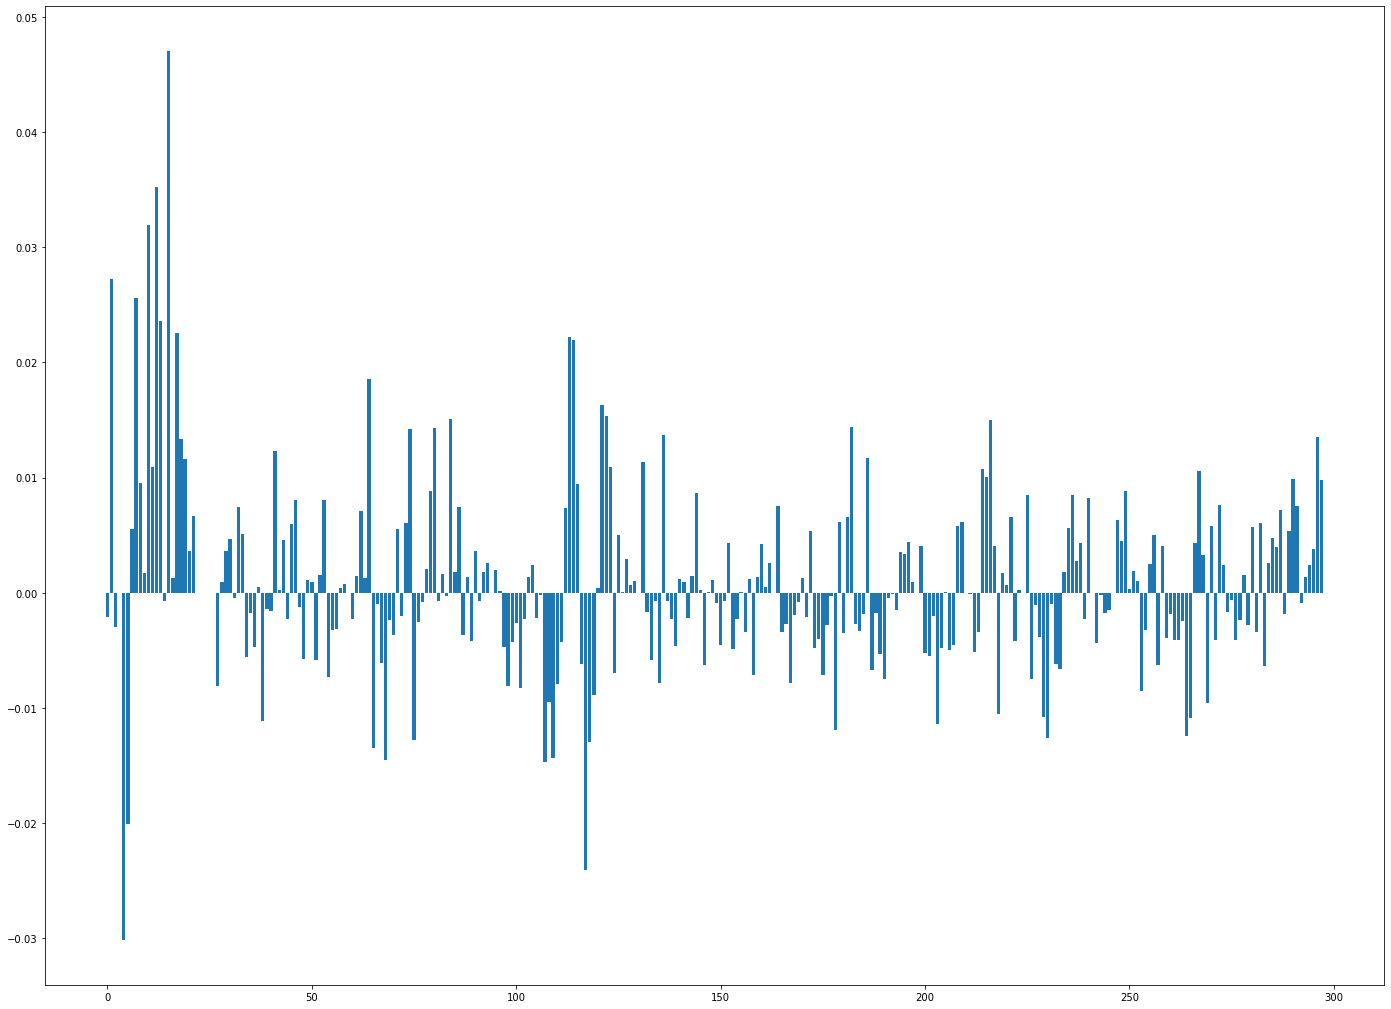

In [151]:
plt.rcParams['figure.figsize'] = (24, 18)
importance = ridge.coef_
plt.bar([x for x in range(len(importance))], importance)
plt.show()